In [18]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import functional as TF
import torchvision.transforms as T
from torchvision import datasets, transforms
import numpy as np

In [11]:
#Define variables

batch_size = 32
img_height = 256
img_width = 256
img_channels = 3
data_dir = 'Spectrograms/train'

In [ ]:
# Define the data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization values
])

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

Text(0.5, 1.0, 'distribution of pixels')

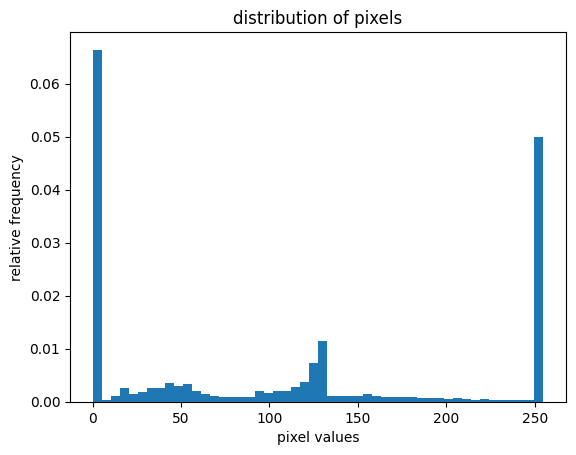

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
# load the image
img_path = data_dir + '/Sam Smith - Unholy (Space Ducks Remix)-8.png'
img = Image.open(img_path)
 
# convert PIL image to numpy array
img_np = np.array(img)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")


([], [])

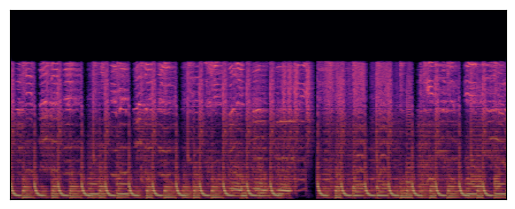

In [17]:
plt.imshow(img_np)
plt.xticks([])
plt.yticks([])

In [19]:
# Define the data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization values
])

# get normalized image
imgTensor = T.ToTensor()(img)
print(imgTensor.shape)
img_normalized = data_transforms(img)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

torch.Size([4, 2220, 5820])


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0